In [160]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_file = pd.read_csv(city_data_to_load)
ride_data_file = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_file = pd.merge(city_data_file, ride_data_file, how="left", on="city")

# Display the data table for preview
city_ride_file.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [161]:
#extract the columns we need
city_ride_redux = city_ride_file.iloc[:,[0,1,2,4,]]
city_ride_redux.head()


,city,driver_count,type,fare
0,Richardfort,38,Urban,13.93
1,Richardfort,38,Urban,14.00
2,Richardfort,38,Urban,17.92
3,Richardfort,38,Urban,10.26
4,Richardfort,38,Urban,23.00


In [162]:
#fares analysis by city type

#separate city data by type
city_ride_by_urban = city_ride_redux.loc[city_ride_redux['type']=='Urban',:]
city_ride_by_rural = city_ride_redux.loc[city_ride_redux['type']=='Rural',:]
city_ride_by_suburban = city_ride_redux.loc[city_ride_redux['type']=='Suburban',:]




In [163]:
#sum fare city type data

city_ride_by_urban_sum = city_ride_by_urban['fare'].sum()
city_ride_by_rural_sum = city_ride_by_rural['fare'].sum()
city_ride_by_suburban_sum = city_ride_by_suburban['fare'].sum()

In [164]:
#combine summed city type data into a data frame 

city_fares_by_type_df = pd.DataFrame({'Urban Fares':[city_ride_by_urban_sum],'Suburban Fares':[city_ride_by_suburban_sum], 'Rural Fares':[city_ride_by_rural_sum]})

#add a Total column
city_fares_by_type_df['Total Fares'] = city_fares_by_type_df['Urban Fares'] + city_fares_by_type_df['Suburban Fares'] + city_fares_by_type_df['Rural Fares']

#create % and avg of fares columns and do the math
city_fares_by_type_df['% Urban'] = (city_fares_by_type_df['Urban Fares']/city_fares_by_type_df['Total Fares'])*100
city_fares_by_type_df['% Suburban'] = (city_fares_by_type_df['Suburban Fares']/city_fares_by_type_df['Total Fares'])*100
city_fares_by_type_df['% Rural'] = (city_fares_by_type_df['Rural Fares']/city_fares_by_type_df['Total Fares'])*100
city_fares_by_type_df['Avg Urban Fare'] = city_ride_by_urban['fare'].mean()
city_fares_by_type_df['Avg Suburban Fare'] = city_ride_by_suburban['fare'].mean()
city_fares_by_type_df['Avg Rural Fare'] = city_ride_by_rural['fare'].mean()

In [165]:
#check columns


city_fares_by_type_df.head()

,Urban Fares,Suburban Fares,Rural Fares,Total Fares,% Urban,% Suburban,% Rural,Avg Urban Fare,Avg Suburban Fare,Avg Rural Fare
0,39854.38,19356.33,4327.93,63538.64,62.724635,30.463872,6.811493,24.525772,30.970128,34.62344


In [166]:
#rearrange columns
city_fares_by_type_df = city_fares_by_type_df[['Total Fares', 'Urban Fares','Avg Urban Fare','% Urban','Suburban Fares','Avg Suburban Fare','% Suburban','Rural Fares','Avg Rural Fare', '% Rural']]
city_fares_by_type_df.head()

,Total Fares,Urban Fares,Avg Urban Fare,% Urban,Suburban Fares,Avg Suburban Fare,% Suburban,Rural Fares,Avg Rural Fare,% Rural
0,63538.64,39854.38,24.525772,62.724635,19356.33,30.970128,30.463872,4327.93,34.62344,6.811493


In [167]:
#df formatted
#city_fares_by_type_df['Total Fares'] = city_fares_by_type_df['Total Fares'].map("${:,.2f}".format)
#city_fares_by_type_df['Urban Fares'] = city_fares_by_type_df['Urban Fares'].map("${:,.2f}".format)
#city_fares_by_type_df['Avg Urban Fares'] = city_ride_by_urban['fare'].map("${:.2f}".format)
#city_fares_by_type_df['% Urban'] = city_fares_by_type_df['% Urban'].map("{:.2f}%".format)
#city_fares_by_type_df['Suburban Fares'] = city_fares_by_type_df['Suburban Fares'].map("${:,.2f}".format)
#city_fares_by_type_df['Avg Suburban Fares'] = city_ride_by_suburban['fare'].map("${:.2f}".format)
#city_fares_by_type_df['% Suburban'] = city_fares_by_type_df['% Suburban'].map("{:.2f}%".format)
#city_fares_by_type_df['Rural Fares'] = city_fares_by_type_df['Rural Fares'].map("${:,.2f}".format)
#city_fares_by_type_df['Avg Rural Fares'] = city_ride_by_rural['fare'].map("${:.2f}".format)
#city_fares_by_type_df['% Rural'] = city_fares_by_type_df['% Rural'].map("{:.2f}%".format)
#

#city_fares_by_type_df.head()

In [168]:
# driver analysis - sum by city type
city_driver_by_urban_sum = city_ride_by_urban['driver_count'].sum()
city_driver_by_rural_sum = city_ride_by_rural['driver_count'].sum()
city_driver_by_suburban_sum = city_ride_by_suburban['driver_count'].sum()

In [169]:
#combine summed driver by city type data into a data frame 

city_driver_by_type_df = pd.DataFrame({'Urban Drivers':[city_driver_by_urban_sum],'Suburban Drivers':[city_driver_by_suburban_sum], 'Rural Drivers':[city_driver_by_rural_sum]})

#add a Total column
city_driver_by_type_df['Total Drivers'] = city_driver_by_type_df['Urban Drivers'] + city_driver_by_type_df['Suburban Drivers'] + city_driver_by_type_df['Rural Drivers']

#create % of fares columns and do the math
city_driver_by_type_df['% Urban Drivers'] = (city_driver_by_type_df['Urban Drivers']/city_driver_by_type_df['Total Drivers'])*100
city_driver_by_type_df['% Suburban Drivers'] = (city_driver_by_type_df['Suburban Drivers']/city_driver_by_type_df['Total Drivers'])*100
city_driver_by_type_df['% Rural Drivers'] = (city_driver_by_type_df['Rural Drivers']/city_driver_by_type_df['Total Drivers'])*100

In [170]:
#rearrange columns
city_driver_by_type_df = city_driver_by_type_df[['Total Drivers', 'Urban Drivers', '% Urban Drivers', 'Suburban Drivers', '% Suburban Drivers', 'Rural Drivers', '% Rural Drivers']]

city_driver_by_type_df.head()

,Total Drivers,Urban Drivers,% Urban Drivers,Suburban Drivers,% Suburban Drivers,Rural Drivers,% Rural Drivers
0,68709,59602,86.74555,8570,12.472893,537,0.781557


In [171]:
#sum fare city type data for ride analysis

city_ridecount_by_urban_sum = city_ride_by_urban['fare'].count()
city_ridecount_by_rural_sum = city_ride_by_rural['fare'].count()
city_ridecount_by_suburban_sum = city_ride_by_suburban['fare'].count()

In [172]:
#combine summed ride by city type data into a data frame 

city_ridecount_by_type_df = pd.DataFrame({'Urban Rides':[city_ridecount_by_urban_sum],'Suburban Rides':[city_ridecount_by_suburban_sum], 'Rural Rides':[city_ridecount_by_rural_sum]})

#add a Total column
city_ridecount_by_type_df['Total Rides'] = city_ridecount_by_type_df['Urban Rides'] + city_ridecount_by_type_df['Suburban Rides'] + city_ridecount_by_type_df['Rural Rides']

#create % of fares columns and do the math
city_ridecount_by_type_df['% Urban Rides'] = (city_ridecount_by_type_df['Urban Rides']/city_ridecount_by_type_df['Total Rides'])*100
city_ridecount_by_type_df['% Suburban Rides'] = (city_ridecount_by_type_df['Suburban Rides']/city_ridecount_by_type_df['Total Rides'])*100
city_ridecount_by_type_df['% Rural Rides'] = (city_ridecount_by_type_df['Rural Rides']/city_ridecount_by_type_df['Total Rides'])*100

In [173]:
#rearrange columns
city_ridecount_by_type_df = city_ridecount_by_type_df[['Total Rides', 'Urban Rides', '% Urban Rides', 'Suburban Rides', '% Suburban Rides', 'Rural Rides', '% Rural Rides']]

city_ridecount_by_type_df.head()

,Total Rides,Urban Rides,% Urban Rides,Suburban Rides,% Suburban Rides,Rural Rides,% Rural Rides
0,2375,1625,68.421053,625,26.315789,125,5.263158


In [174]:
total_fares = city_ride_file["fare"].sum()
total_fares

63538.64

In [175]:
#check the data
city_ride_redux.count()

city            2375
driver_count    2375
type            2375
fare            2375
dtype: int64

In [176]:
#city_ride_redux.dtypes

In [177]:
city_counts_b = city_ride_redux.groupby(['city']).count()

city_ride_count_df = pd.DataFrame(city_counts_b)

del city_ride_count_df["driver_count"]
del city_ride_count_df["type"]

city_ride_count_df = city_ride_count_df.rename(columns={"fare":"Rides"})

city_ride_count_df.head()





,Rides
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [178]:
#total_rides = city_ride_count_df["Rides"].sum()
#total_rides_df = pd.DataFrame(total_rides)
#total_rides

In [179]:
#group  data by city
city_ride_grouped_city = city_ride_redux.groupby(['city'])
city_ride_redux.head()

,city,driver_count,type,fare
0,Richardfort,38,Urban,13.93
1,Richardfort,38,Urban,14.00
2,Richardfort,38,Urban,17.92
3,Richardfort,38,Urban,10.26
4,Richardfort,38,Urban,23.00


In [180]:
#list of all cities
#city_list = city_ride_redux["city"].unique()


In [181]:
city_fares = city_ride_redux.iloc[:,[0,3]]
city_fares.head()



,city,fare
0,Richardfort,13.93
1,Richardfort,14.00
2,Richardfort,17.92
3,Richardfort,10.26
4,Richardfort,23.00


In [182]:
#creating city fare total df
city_fares_totals = city_fares.groupby(['city']).sum()
city_fares_totals_df = pd.DataFrame(city_fares_totals)

city_fares_totals_df.head()
        

,fare
city,
Amandaburgh,443.55
Barajasview,557.31
Barronchester,582.76
Bethanyland,593.21
Bradshawfurt,400.64


In [183]:
#merge total fares and total rides
city_fares_rides_sum = pd.merge(city_fares_totals_df,city_ride_count_df, how='left',on='city')
city_fares_rides_sum.head()

,fare,Rides
city,,
Amandaburgh,443.55,18
Barajasview,557.31,22
Barronchester,582.76,16
Bethanyland,593.21,18
Bradshawfurt,400.64,10


In [184]:
#finding average fare by city
city_grouped_avg_fare = city_ride_grouped_city['fare'].mean() 
city_grouped_avg_fare_df = pd.DataFrame(city_grouped_avg_fare)
city_grouped_avg_fare_df.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [185]:
#merge city fare totals and city fare average
city_fare_profile = pd.merge(city_fares_rides_sum,city_grouped_avg_fare_df,how='left',on='city')

city_fare_profile = city_fare_profile.rename(columns = {'fare_x':'Total Fares','fare_y':'Average Fare'})
city_fare_profile.head()

,Total Fares,Rides,Average Fare
city,,,
Amandaburgh,443.55,18,24.641667
Barajasview,557.31,22,25.332273
Barronchester,582.76,16,36.422500
Bethanyland,593.21,18,32.956111
Bradshawfurt,400.64,10,40.064000


In [186]:
#determining driver counts
driver_count_city = city_ride_redux.sort_values(['driver_count'], ascending=False)
driver_count_city_clean = driver_count_city.drop_duplicates(['city'])
total_drivers = driver_count_city_clean["driver_count"].sum()
driver_count_city_clean_df = pd.DataFrame(driver_count_city_clean)
del driver_count_city_clean_df['fare']
#total_drivers
driver_count_city_clean_df.head()

,city,driver_count,type
638,West Samuelburgh,73,Urban
1211,South Michelleport,72,Urban
125,West Anthony,70,Urban
751,Liumouth,69,Urban
57,Port Angela,67,Urban


In [192]:
#merging 
city_ride_profile = pd.merge(city_fare_profile,driver_count_city_clean_df, how="left", on="city")


#city_ride_driver_fare_merge["fare_x"] = city_ride_driver_fare_merge["fare_x"].astype(float).map("${:.2f}".format)
#city_ride_driver_fare_clean = city_ride_driver_fare_merge.rename(columns={"fare_x":"Average Fare","driver_count": "Drivers per City","type":"City Type"})

city_ride_profile = city_ride_profile.rename(columns={'city':'City','driver_count':'Drivers','type':'City Type'})
city_ride_profile = city_ride_profile[['City','Rides','Drivers','Total Fares','Average Fare', 'City Type']]
city_ride_profile.head()


,City,Rides,Drivers,Total Fares,Average Fare,City Type
0,Amandaburgh,18,12,443.55,24.641667,Urban
1,Barajasview,22,26,557.31,25.332273,Urban
2,Barronchester,16,11,582.76,36.422500,Suburban
3,Bethanyland,18,22,593.21,32.956111,Suburban
4,Bradshawfurt,10,7,400.64,40.064000,Rural


In [188]:
#city_ride_profile_sum_df = pd.merge(city_ride_count_df,city_ride_profile, how="left", on="city")
#del city_ride_sum_df['fare_y']
#del city_ride_sum_df['fare_x']

#city_ride_sum_df.head()

In [189]:
#find percentages
#print(city_ride_sum_df["Total Fares"].dtype)
#per_of_total_fares = ((city_ride_profile["Total Fares"]/city_ride_profile["Total Fares"].sum())*100)
#city_ride_sum_df["% of Total Sales"] = per_of_total_fares
#city_ride_sum_df["% of Total Drivers"] = ((city_ride_sum_df["Drivers per City"]/city_ride_sum_df["Drivers per City"].sum())*100)
#city_ride_sum_df["% of Total Rides"] = ((city_ride_sum_df["Rides"]/city_ride_sum_df["Rides"].sum())*100)

#city_ride_sum_df.head()

In [190]:
#city_ride_sum_df = city_ride_sum_df["Total Fares"].map("${:.2f}".format)
#city_ride_sum_df = city_ride_sum_df["% of Total Sales"].astype(float).map("{:.2f}%".format)
#city_ride_sum_df = city_ride_sum_df["% of Total Drivers"].astype(float).map("{:.2f}%".format)
#city_ride_sum_df = city_ride_sum_df["% of Total Riders"].astype(float).map("{:.2f}%".format)
#city_ride_sum_df.head()

In [ ]:
#Summary data frames to call:
# City by type fares analysis: city_fares_by_type_df
# City by type driver analysis: city_driver_by_type_df
# City by type rides analysis: city_ridecount_by_type_df

# City analysis - by city fares, averages, drivers, rides: city_ride_profile

## Bubble Plot of Ride Sharing Data

In [212]:
# Obtain the x and y coordinates for each of the three city types: city_ride_profile

city_ride_profile.head()



,City,Rides,Drivers,Total Fares,Average Fare,City Type
0,Amandaburgh,18,12,443.55,24.641667,Urban
1,Barajasview,22,26,557.31,25.332273,Urban
2,Barronchester,16,11,582.76,36.422500,Suburban
3,Bethanyland,18,22,593.21,32.956111,Suburban
4,Bradshawfurt,10,7,400.64,40.064000,Rural


In [224]:
# Build the scatter plots for each city types

x = city_ride_profile['Rides']
y = city_ride_profile['Average Fare']
s = city_ride_profile['Total Fares']



# Incorporate the other graph properties
#colors = {'Urban':'gold','Suburban':'lightcoral','Rural':'lightskyblue'}
# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

TypeError: 'function' object is not subscriptable

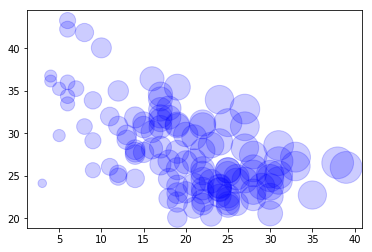

In [227]:


plt.scatter(x, y, s, c = 'blue', alpha=0.2)
plt.title['Pyber Ride data']


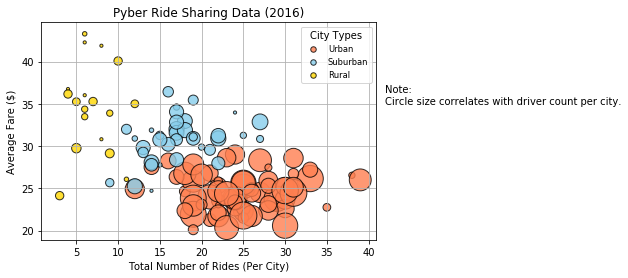

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [193]:
# Calculate Type Percents: city_fares_by_type_df

# Build Pie Chart

# Save Figure

city_fares_by_type_df


,Total Fares,Urban Fares,Avg Urban Fare,% Urban,Suburban Fares,Avg Suburban Fare,% Suburban,Rural Fares,Avg Rural Fare,% Rural
0,63538.64,39854.38,24.525772,62.724635,19356.33,30.970128,30.463872,4327.93,34.62344,6.811493


Text(0.5,1,'Percent of Total Fares by City Type')

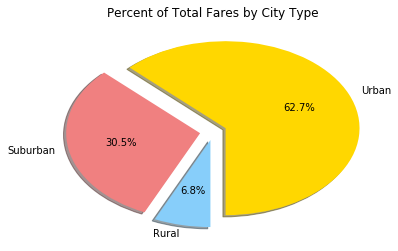

In [205]:
fare_type_labels = ["Urban","Suburban","Rural"]
x = [39854.38,19356.33,4327.93]
fare_type_colors = ["gold","lightcoral","lightskyblue"]
fare_type_explode = (0.1, 0.1, 0.1)

plt.pie(x, explode=fare_type_explode, labels=fare_type_labels, colors=fare_type_colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("Percent of Total Fares by City Type")

## Total Rides by City Type

In [204]:
# Calculate Ride Percents : city_ridecount_by_type_df
city_ridecount_by_type_df

,Total Rides,Urban Rides,% Urban Rides,Suburban Rides,% Suburban Rides,Rural Rides,% Rural Rides
0,2375,1625,68.421053,625,26.315789,125,5.263158


Text(0.5,1,'Percent of Total Rides by City Type')

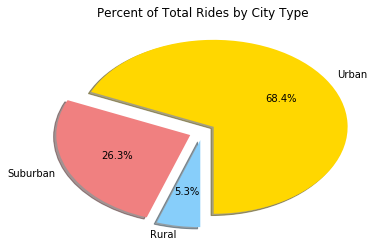

In [207]:


# Build Pie Chart
ride_labels = ["Urban", "Suburban", "Rural"]
x = [1625,625,125]
ride_type_colors = ["gold","lightcoral","lightskyblue"]
ride_type_explode = [0.1,0.1,0.1]

plt.pie(x, explode=ride_type_explode, labels=ride_labels, colors=ride_type_colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("Percent of Total Rides by City Type")


# Save Figure


## Total Drivers by City Type

In [209]:
# Calculate Driver Percents: city_driver_by_type_df

city_driver_by_type_df


,Total Drivers,Urban Drivers,% Urban Drivers,Suburban Drivers,% Suburban Drivers,Rural Drivers,% Rural Drivers
0,68709,59602,86.74555,8570,12.472893,537,0.781557


Text(0.5,1,'Percent of Total Drivers by City Type')

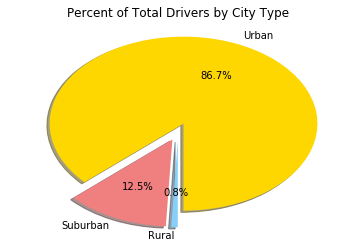

In [210]:
# Build Pie Chart
x = [59602,8570,537]
driver_labels = ["Urban", "Suburban", "Rural"]
driver_colors = ["gold","lightcoral","lightskyblue"]
explode = [0.1,0.1,0.1]

plt.pie(x, explode=explode, labels=driver_labels, colors=driver_colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("Percent of Total Drivers by City Type")

# Save Figure